In [22]:
import numpy as np
import matplotlib.pyplot as plt


## Simulations de browniens BS - test

In [63]:
mu=0.1 # drift

sigma=0.3 # vol

S0=100 # spot

n=3750 # steps

T=15 # years

M = 100 # simulations

In [64]:
def BS(mu, sigma, S0, T, n, M):
    dt=T/n
    St = np.exp((mu-sigma**2/2) * dt + sigma*np.random.normal(0, np.sqrt(dt), size=(M, n)).T)
    St=np.vstack([np.ones(M), St])
    St=S0*St.cumprod(axis=0)
    return St

In [70]:
BS_test = BS(mu, sigma, S0, T, n, M)

In [33]:
BS_test.shape

(3750, 100)

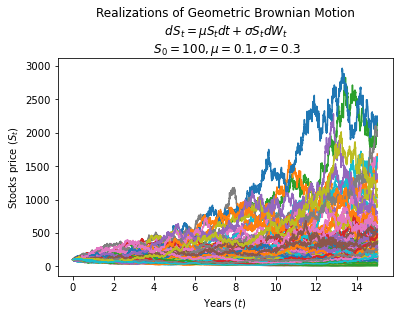

In [71]:
# time interval
time=np.linspace(0, T, n+1)
tt=np.full(shape=(M, n+1), fill_value=time).T

plt.plot(tt, BS_test)
plt.xlabel("Years $(t)$")
plt.ylabel("Stocks price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()

## Simulations GBM corrélés 

In [23]:
# paramètres

d=4
S0 = [100, 100, 100, 100]  
mu = np.array([0.03, 0.05, 0.07, 0.02])  
sigma = np.array([0.2, 0.25, 0.15, 0.3])  
cov = np.array([[1.0, 0.8, 0.5, 0.2],
                        [0.8, 1.0, 0.4, 0.3],
                        [0.5, 0.4, 1.0, 0.6],
                        [0.2, 0.3, 0.6, 1.0]]) 

T=15
n=3750


In [12]:
def GMB_correlated(S0, mu, sigma, cov, T, n, d):
    dt=T/n
    L = np.linalg.cholesky(cov)
    Z=np.random.randn(d, n)
    Z_corr = L @ Z

    S = np.zeros((d, n+1))
    S[:, 0] = S0

    for t in range(1, n+1):
        S[:, t] = S[:, t-1] * np.exp((mu-sigma**2/2)*dt + sigma*np.sqrt(dt)*Z_corr[:,t-1])

    return S

In [13]:
S= GMB_correlated(S0, mu, sigma, cov, T, n, d)

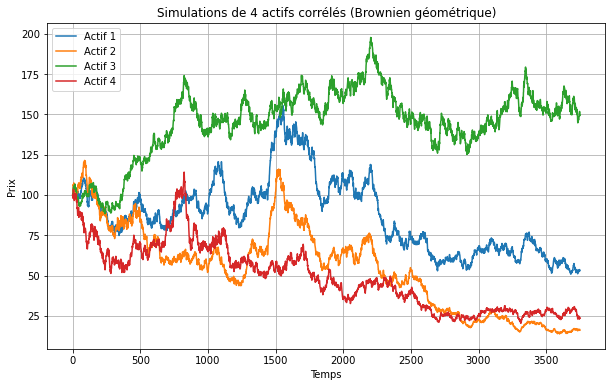

In [16]:
# Plot des résultats
plt.figure(figsize=(10,6))
for i in range(4):
    plt.plot(S[i], label=f'Actif {i+1}')
plt.title('Simulations de 4 actifs corrélés (Brownien géométrique)')
plt.xlabel('Temps')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# performance

def portfolio_performance(weights, mu, cov):
    return_portfolio = np.dot(weights, mu)
    vol_portfolio = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) 
    return return_portfolio, vol_portfolio